

### Reseach Question : Having bachlor, master or doctor results in higher income in Japan?

How : Referencing to the stats "職種別民間給与実態調査"(in English, urvey on the Actual Salary Conditions by Occupation in the Private Sector)

## 1.1 Download data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.getcwd()

'/Users/minesakikodai/Documents/GitHub/graspp_2025_spring/notebooks/assignment_individual/HW1'

In [233]:
os.listdir()

['HW1_lastfirst.ipynb',
 'HW1_BairdCory.ipynb',
 'comparison.ipynb',
 'HW1_MinesakiKodai.ipynb']

In [264]:
df_2024 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2024_starting_salary.csv", encoding="shift-jis")
df_2023 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2023_starting_salary.csv", encoding="shift-jis")
df_2022 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2022_starting_salary.csv", encoding="shift-jis")
df_2021 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2021_starting_salary.csv", encoding="shift-jis")
df_2020 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2020_starting_salary.csv")
df_2019 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2019_starting_salary.csv")
df_2018 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2018_starting_salary.csv")
df_2017 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2017_starting_salary.csv")
df_2016 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2016_starting_salary.csv")
df_2015 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2015_starting_salary.csv")
df_2014 = pd.read_csv("../../../data/raw/starting_salary_japan_Minesaki/2014_starting_salary.csv")


## 1.2 Manipulate Data

In [265]:
### WARNING : This function can be used only for starting salary data between 2021 - 2024

def clean_data(df):
    
    # Reframe the index and columns
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    df.index = df.iloc[:, 0]
    df = df.drop(df.index[-1])
    df = df.drop(columns = ['「平均初任給月額・企業規模計」の備考',
                            '「平均初任給月額・企業規模500人以上」の備考',
                            '「平均初任給月額・企業規模100人以上500人未満」の備考',
                            '「平均初任給月額・企業規模50人以上100人未満」の備考'])
    df.index.name = None
    df = df.drop(columns="職種名（学歴）")
    
    # Replace "X" or "***" with np.nan
    df = df.replace({"X": np.nan, "***": np.nan, "NaN" : np.nan})
    df = df.drop(index=np.nan)
    
    # Define dictionaries to translate Japanese to English
    jpn2eng4index = {
        '新卒事務員（大学院博士課程修了）': 'New Graduate Office Worker (Doctoral Degree)',
        '新卒事務員（大学院修士課程修了）': 'New Graduate Office Worker(Master\'s Degree)',
        '新卒事務員（大学卒）': 'New Graduate Office Worker (University Graduate)',
        '新卒事務員（短大卒）': 'New Graduate Office Worker (Junior College Graduate)',
        '新卒事務員（高校卒）': 'New Graduate Office Worker (High School Graduate)',
        '新卒技術者（大学院博士課程修了）': 'New Graduate Engineer (Doctoral Degree)',
        '新卒技術者（大学院修士課程修了）': 'New Graduate Engineer (Master\'s Degree)',
        '新卒技術者（大学卒）': 'New Graduate Engineer (University Graduate)',
        '新卒技術者（短大卒）': 'New Graduate Engineer (Junior College Graduate)',
        '新卒技術者（高校卒）': 'New Graduate Engineer (High School Graduate)',
        '新卒研究員（大学院博士課程修了）': 'New Graduate Researcher (Doctoral Degree)',
        '新卒研究員（大学院修士課程修了）': 'New Graduate Researcher (Master\'s Degree)',
        '新卒研究員（大学卒）': 'New Graduate Researcher (University Graduate)',
        '新卒研究補助員（短大卒）': 'New Graduate Research Assistant (Junior College Graduate)',
        '新卒研究補助員（高校卒）': 'New Graduate Research Assistant (High School Graduate)',
        '準新卒医師': 'Almost New Graduate Doctor',
        '準新卒薬剤師': 'Almost New Graduate Pharmacist',
        '準新卒診療放射線技師 ': 'Almost New Graduate Radiologic Technologist',
        '新卒栄養士（大学卒）': 'New Graduate Nutritionist (University Graduate)',
        '新卒栄養士（短大卒）': 'New Graduate Nutritionist (Junior College Graduate)',
        '準新卒看護師': 'Almost New Graduate Nurse',
        '準新卒准看護師': 'Almost New Graduate Licensed Practical Nurse',
        '新卒大学助教（大学院博士課程修了）': 'New Graduate University Assistant Professor (Doctoral Degree)',
        '新卒大学助教（大学院修士課程修了）': 'New Graduate University Assistant Professor (Master\'s Degree)',
        '新卒大学助教（大学卒）': 'New Graduate University Assistant Professor (University Graduate)',
        '新卒高等学校教諭（大学院修士課程修了）': 'New Graduate High School Teacher (Master\'s Degree)',
        '新卒高等学校教諭（大学卒）': 'New Graduate High School Teacher (University Graduate)',
        '新卒船員（海上技術学校本科卒 ）': 'New Graduate Seaman (Maritime Technical School Graduate)'
    }

    jpn2eng4columns = {
        '職種名（学歴）': 'Job Title (Academic Background)',
        '調査事業所数': 'Number of Surveyed Business Establishments',
        '調査事業所数（復元後）': 'Number of Surveyed Business Establishments (Restored)',
        '平均初任給月額・企業規模計': 'Average Starting Monthly Salary by Company Size (Total)',
        '平均初任給月額・企業規模500人以上': 'Average Starting Monthly Salary by Company Size (500+ Employees)',
        '平均初任給月額・企業規模100人以上500人未満': 'Average Starting Monthly Salary by Company Size (100-499 Employees)',
        '平均初任給月額・企業規模50人以上100人未満': 'Average Starting Monthly Salary by Company Size (50-99 Employees)'
    }
    
    # Rename index and columns
    df.index = df.index.map(jpn2eng4index)
    df.columns = df.columns.map(jpn2eng4columns)
    
    return df

In [266]:
# This function can be used only for starting salary data between 2014 - 2020
def clean_data2(df):
    # drop unnecessary axis
    df = df.drop(columns = {"Unnamed: 1", "Unnamed: 2", "Unnamed: 3",'調　査\n実人員', '調 査 \n事業所数','調 査 実\n事業所数', '調査事\n業所数\n(復元後)',"平  均  初  任  給  月  額","Unnamed: 10", "Unnamed: 12", "Unnamed: 14","職　種　名　（学歴）", 'Unnamed: 4' }, errors = "ignore")
    df = df.drop(index = {0,1,2,31,32,33,34}, errors = "ignore")
    # rename the index and column
    jpn2eng4index = {
        3 : 'New Graduate Office Worker (Doctoral Degree)',
        4 : 'New Graduate Office Worker (Master\'s Degree)',
        5 : 'New Graduate Office Worker (University Graduate)',
        6 : 'New Graduate Office Worker (Junior College Graduate)',
        7 : 'New Graduate Office Worker (High School Graduate)',
        8 : 'New Graduate Engineer (Doctoral Degree)',
        9 : 'New Graduate Engineer (Master\'s Degree)',
        10 : 'New Graduate Engineer (University Graduate)',
        11 : 'New Graduate Engineer (Junior College Graduate)',
        12 : 'New Graduate Engineer (High School Graduate)',
        13 : 'New Graduate Researcher (Doctoral Degree)',
        14 : 'New Graduate Researcher (Master\'s Degree)',
        15 : 'New Graduate Researcher (University Graduate)',
        16 : 'New Graduate Research Assistant (Junior College Graduate)',
        17 : 'New Graduate Research Assistant (High School Graduate)',
        18 : 'Almost New Graduate Doctor',
        19 : 'Almost New Graduate Pharmacist',
        20 : 'Almost New Graduate Radiologic Technologist',
        21 : 'New Graduate Nutritionist (University Graduate)',
        22 : 'New Graduate Nutritionist (Junior College Graduate)',
        23 : 'Almost New Graduate Nurse',
        24 : 'Almost New Graduate Licensed Practical Nurse',
        25 : 'New Graduate University Assistant Professor (Doctoral Degree)',
        26 : 'New Graduate University Assistant Professor (Master\'s Degree)',
        27 : 'New Graduate University Assistant Professor (University Graduate)',
        28 : 'New Graduate High School Teacher (Master\'s Degree)',
        29 : 'New Graduate High School Teacher (University Graduate)',
        30 : 'New Graduate Seaman (Maritime Technical School Graduate)'
    }
    
    jpn2eng4columns = {
        'Unnamed: 9'  : 'Average Starting Monthly Salary by Company Size (Total)',
        'Unnamed: 11' : 'Average Starting Monthly Salary by Company Size (500+ Employees)',
        'Unnamed: 13' : 'Average Starting Monthly Salary by Company Size (100-499 Employees)',
        'Unnamed: 15' : 'Average Starting Monthly Salary by Company Size (50-99 Employees)'
        }
    
    df.index = df.index.map(jpn2eng4index)
    df.columns = df.columns.map(jpn2eng4columns)

    # remove non-numeric values
    df = df.replace({"x" : np.nan, "-" :np.nan})
    df = df.replace({r'\s+': '', r'[^\d.]': ''}, regex=True)
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df

In [271]:
# re-define dataframes again after data-cleaning
# WARNING 1 : DO NOT RUN THEM COLLECTIVELY BUT INDIVIDUALLY
# WATNING 2 : YOU CAN RUN THEM ONLY ON TIME
#df_2024 = clean_data(df_2024)
#df_2023 = clean_data(df_2023)
#df_2022 = clean_data(df_2022)
#df_2021 = clean_data(df_2021)

# drop a column from df_2021 as it has an irrelevant column
df_2021 = df_2021.drop(columns = np.nan)

In [272]:
## re-define dataframes again after data-cleaning
# WATNING : YOU CAN RUN THEM ONLY ON TIME
df_2020 = clean_data2(df_2020)
df_2019 = clean_data2(df_2019)
df_2018 = clean_data2(df_2018)
df_2017 = clean_data2(df_2017)
df_2016 = clean_data2(df_2016)
df_2015 = clean_data2(df_2015)
df_2014 = clean_data2(df_2014)


In [274]:
# drop unnecessary columns
df_2024 = df_2024.drop(columns = {"Number of Surveyed Business Establishments", "Number of Surveyed Business Establishments (Restored)"})
df_2023 = df_2023.drop(columns = {"Number of Surveyed Business Establishments", "Number of Surveyed Business Establishments (Restored)"})
df_2022 = df_2022.drop(columns = {"Number of Surveyed Business Establishments", "Number of Surveyed Business Establishments (Restored)"})
df_2021 = df_2021.drop(columns = {"Number of Surveyed Business Establishments", "Number of Surveyed Business Establishments (Restored)"})

## 1.3 Merge Data

In [276]:
# Merging dateframes 
df_14_24 = pd.concat([df_2014,df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], axis = 1)
df_14_24 = df_14_24.astype(float) 

# give years to each columns
for i in range(44):
    if i <= 3:
        df_14_24.columns.values[i] = str("2014_") + df_14_24.columns.values[i]
    elif i <= 7:
        df_14_24.columns.values[i] = str("2015_") + df_14_24.columns.values[i]
    elif i <= 11:
        df_14_24.columns.values[i] = str("2016_") + df_14_24.columns.values[i]
    elif i <= 15:
        df_14_24.columns.values[i] = str("2017_") + df_14_24.columns.values[i]
    elif i <= 19:
        df_14_24.columns.values[i] = str("2018_") + df_14_24.columns.values[i]
    elif i <= 23:
        df_14_24.columns.values[i] = str("2019_") + df_14_24.columns.values[i]
    elif i <= 27:
        df_14_24.columns.values[i] = str("2020_") + df_14_24.columns.values[i]
    elif i <= 31:
        df_14_24.columns.values[i] = str("2021_") + df_14_24.columns.values[i]
    elif i <= 35:
        df_14_24.columns.values[i] = str("2022_") + df_14_24.columns.values[i]
    elif i <= 39:
        df_14_24.columns.values[i] = str("2023_") + df_14_24.columns.values[i]
    else:
        df_14_24.columns.values[i] = str("2024_") + df_14_24.columns.values[i]

## 2.1 Descriptive Stats

In [278]:
# Descriptive Stats of Salary by Company Size 

# make a function to exact columns or index with keyword
def get_key(df, axis, keyword):
    if axis == "col":
        return [col for col in df.columns if keyword in col]
    elif axis == "idx":
        return [idx for idx in df.index if keyword in idx]
    
# columns
total_columns = get_key(df_14_24, "col", "Total")
big_columns = get_key(df_14_24, "col", "500+ Employees")
medium_columns = get_key(df_14_24, "col", "100-499 Employees")
small_columns = get_key(df_14_24, "col", "50-99 Employees")

#index
high_school_graduate = get_key(df_14_24, "idx", "High School")
junior_college_graduate = get_key(df_14_24, "idx", "Junior College")
univ_graduate = get_key(df_14_24, "idx", "University")
master_holder = get_key(df_14_24, "idx", "Master")
doctor_holder = get_key(df_14_24, "idx", "Doctoral")

## Calculate descriptive stats
total_stats = df_14_24[total_columns].describe()
big_stats = df_14_24[big_columns].describe()
medium_stats = df_14_24[medium_columns].describe()
small_stats = df_14_24[small_columns].describe()

Text(0.5, 1.0, 'Average starting salary v.s. Standard deviation of starting salary')

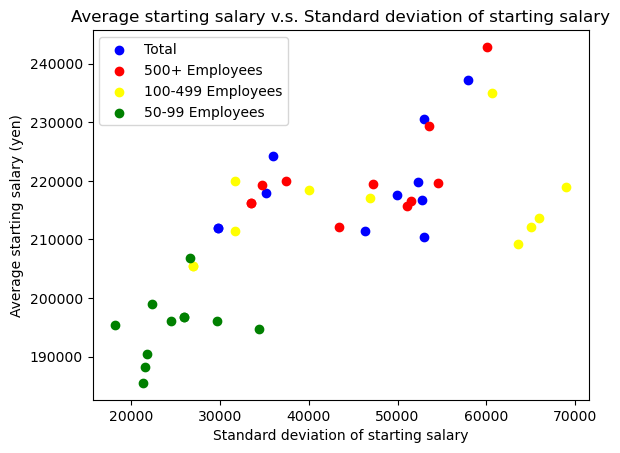

In [291]:
## Visualise Stats

y1 = [total_stats.loc["mean"]]
x1 = [total_stats.loc["std"]]

y2 = [big_stats.loc["mean"]]
x2 = [big_stats.loc["std"]]

y3 = [medium_stats.loc["mean"]]
x3 = [medium_stats.loc["std"]]

y4 = [small_stats.loc["mean"]]
x4 = [small_stats.loc["std"]]
plt.scatter(x1, y1, c = "blue", label = "Total")
plt.scatter(x2, y2, c = "red", label = "500+ Employees")
plt.scatter(x3, y3, c = "yellow", label = "100-499 Employees")
plt.scatter(x4, y4, c = "green", label = "50-99 Employees")
plt.ylabel("Average starting salary (yen)")
plt.xlabel("Standard deviation of starting salary")
plt.legend()
plt.title("Average starting salary v.s. Standard deviation of starting salary")

## 2.2 Visualising Data

In [280]:
## extract only necessary data

target_columns = total_columns + big_columns + medium_columns + small_columns

hs_stats = df_14_24.loc[high_school_graduate, target_columns].describe()
jc_stats = df_14_24.loc[junior_college_graduate, target_columns].describe()
univ_stats = df_14_24.loc[univ_graduate, target_columns].describe()
master_stats = df_14_24.loc[master_holder, target_columns].describe()
doctor_stats = df_14_24.loc[doctor_holder, target_columns].describe()

In [281]:
## calculate descriptive stats for total companies
hs_stats_total = df_14_24.loc[high_school_graduate, total_columns].describe()
jc_stats_total = df_14_24.loc[junior_college_graduate, total_columns].describe()
univ_stats_total = df_14_24.loc[univ_graduate, total_columns].describe()
master_stats_total = df_14_24.loc[master_holder, total_columns].describe()
doctor_stats_total = df_14_24.loc[doctor_holder, total_columns].describe()

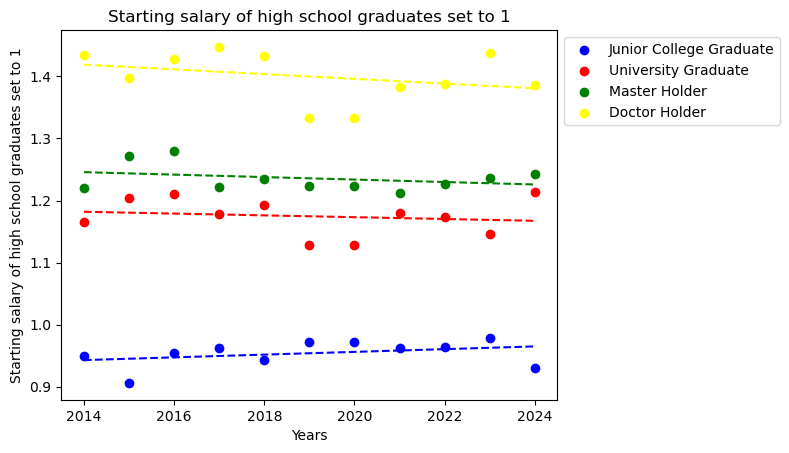

In [293]:
import matplotlib.pyplot as plt
import numpy as np


x = list(range(2014, 2025))


y1 = (jc_stats_total.loc["mean"]/hs_stats_total.loc["mean"]).to_list()
y2 = (univ_stats_total.loc["mean"]/hs_stats_total.loc["mean"]).to_list()
y3 = (master_stats_total.loc["mean"]/hs_stats_total.loc["mean"]).to_list()
y4 = (doctor_stats_total.loc["mean"]/hs_stats_total.loc["mean"]).to_list()


plt.scatter(x, y1, c="blue", label="Junior College Graduate")
plt.scatter(x, y2, c="red", label="University Graduate")
plt.scatter(x, y3, c="green", label="Master Holder")
plt.scatter(x, y4, c="yellow", label="Doctor Holder")


def plot_regression_line(x, y, color):
    slope, intercept = np.polyfit(x, y, 1)  # Linear regression
    regression_line = slope * np.array(x) + intercept
    plt.plot(x, regression_line, color=color, linestyle='--')  # Plot regression line

## regression line
plot_regression_line(x, y1, 'blue')
plot_regression_line(x, y2, 'red')
plot_regression_line(x, y3, 'green')
plot_regression_line(x, y4, 'yellow')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Years")
plt.ylabel("Starting salary of high school graduates set to 1")
plt.title("Starting salary of high school graduates set to 1")


plt.show()


Text(0.5, 1.0, 'Average starting salary v.s. Standard deviation of starting salary by academic background')

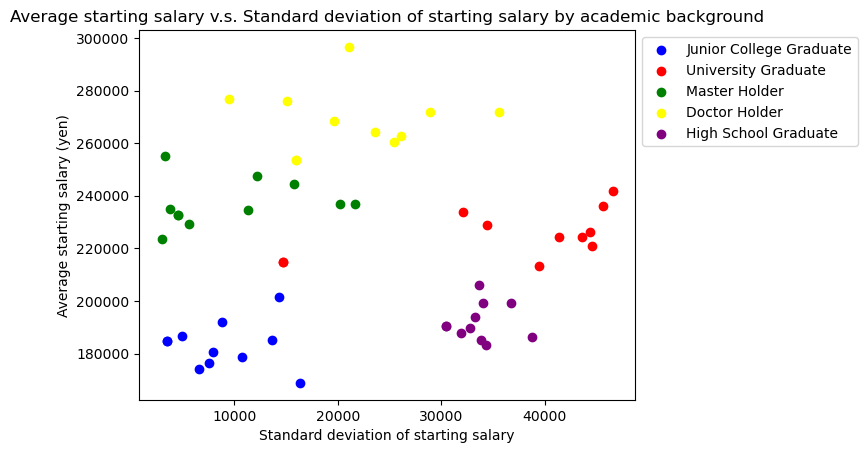

In [292]:
# make a scatter plot mean vs std by academic background
y1 = (jc_stats_total.loc["mean"]).to_list()
y2 = (univ_stats_total.loc["mean"]).to_list()
y3 = (master_stats_total.loc["mean"]).to_list()
y4 = (doctor_stats_total.loc["mean"]).to_list()
y5 = (hs_stats_total.loc["mean"]).to_list()

x1 = (jc_stats_total.loc["std"]).to_list()
x2 = (univ_stats_total.loc["std"]).to_list()
x3 = (master_stats_total.loc["std"]).to_list()
x4 = (doctor_stats_total.loc["std"]).to_list()
x5 = (hs_stats_total.loc["std"]).to_list()

plt.scatter(x1, y1, c = "blue", label = "Junior College Graduate")
plt.scatter(x2, y2, c = "red", label = "University Graduate")
plt.scatter(x3, y3, c = "green", label = "Master Holder")
plt.scatter(x4, y4, c = "yellow", label = "Doctor Holder")
plt.scatter(x5, y5, c = "purple", label = "High School Graduate")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Standard deviation of starting salary")
plt.ylabel("Average starting salary (yen)")
plt.title("Average starting salary v.s. Standard deviation of starting salary by academic background")

## Result, Discussion

### The second figure implies that higher education does not necessarily contribute to higher starting salary. Especially, junior college graduates' starting salary has been lower than high school students' starting salary. Overall, the regression lines shows that the difference in starting salary by academic backgroung is smaller, given the figure which shows that starting salary of doctor holders, master holders, and university graduates has been slightly declining.


### The third figure shows that the standard deviation of university graduates' and high school graduates' starting salary is comparatively bigger than that of the others'. As a general trend, the starting salary for master holders has a smaller spread compared to doctor holders. This suggests that there is less variation in the salaries of master holders, which could indicate a more standardized or uniform salary range in that group. In contrast, the larger spread for doctor holders may imply a greater diversity in starting salaries, possibly due to differences in specialization, industry, or geographical location. 